# Explore here

In [2]:
#Step 1: Loading the dataset
import pandas as pd

time_series = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
time_series.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [3]:
time_series["date"] = pd.to_datetime(time_series.date)
total_data = time_series.set_index("date")
ts_total = total_data["sales"]
ts_total.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

In [4]:
#Step 2: Constructing and analyzing the time serie
time_series = time_series.set_index("date")
time_series = time_series["sales"]
time_series.head()


date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

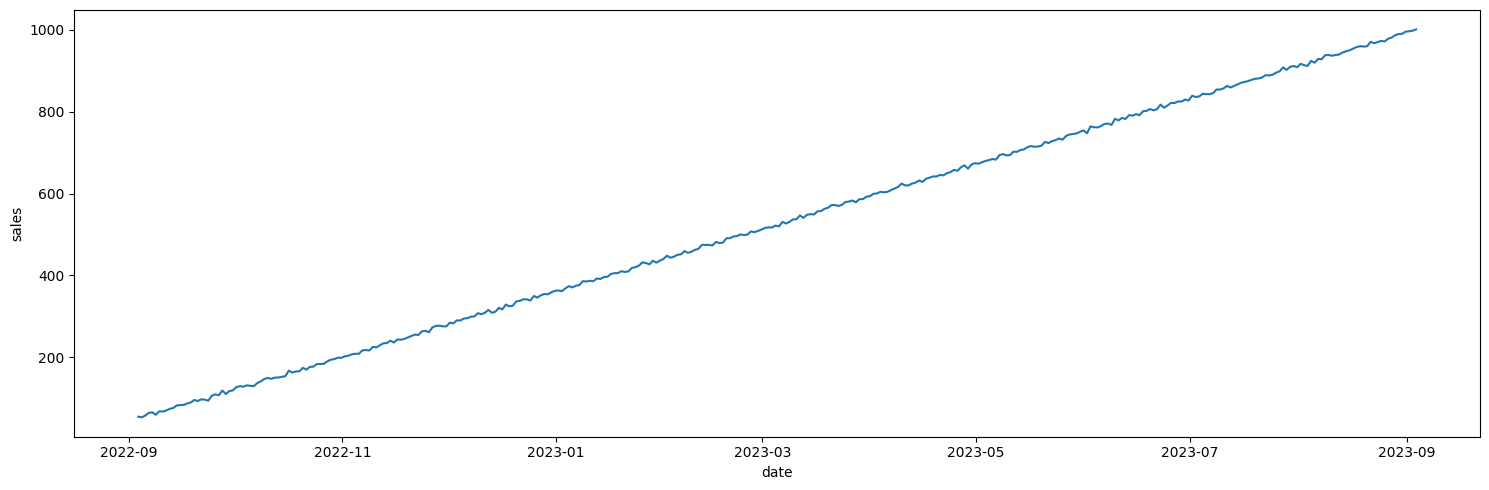

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visualizing the time series (In this case the time dimension will be composed by the date and the data will be the sales)
fig, axis = plt.subplots(figsize = (15, 5))

sns.lineplot(time_series)

plt.tight_layout()

plt.show()


#Analysis of a time series:
to analyze a time series several parameters will be studied:

-Trend: An upward trend is apparent, indicating that the sales has increased over time. 
-Seasonality: there is no seasonality observed, that means that the product was equally in demand throughout the entire period of time.
-Variability: There is a very low tendency of variability.
-As for the tensor of the time serie, it represents a precise point in time, including hours, minutes, seconds, and microseconds.

In [6]:
#Decomposition of the series
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(time_series, period = 12)
decomposition

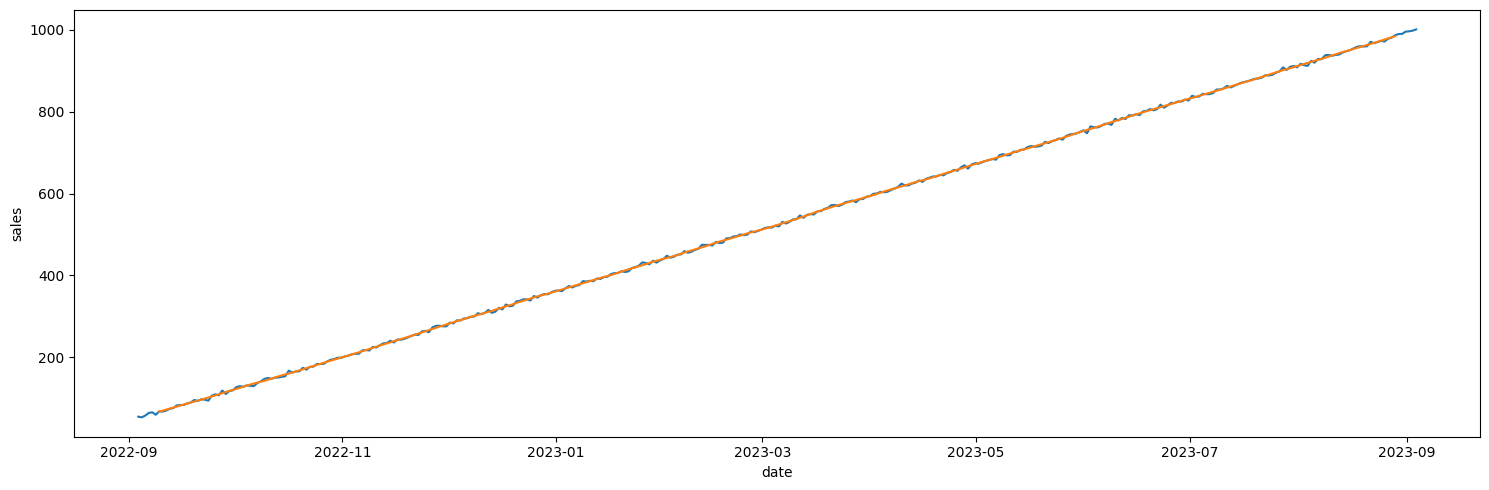

In [7]:
#Trend analysis
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (15, 5))

sns.lineplot(data = time_series)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

As we can see from the graph there is a clear positive trend over the studied period of time

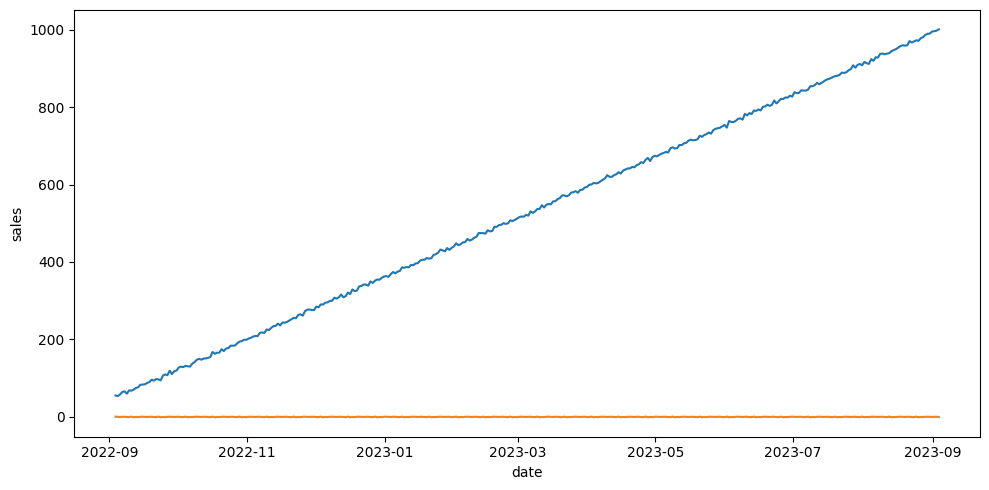

In [8]:
#Seasonality analysis
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = time_series)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

As it was mentioned before there is no seasonality in the studied time serie

In [9]:
#Appling the Dickey-Fuller test to assess the seasonality
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(time_series)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

Since the p-value is greater than 0.05, the null hypothesis (the serie is stationary) will be rejected, and the alternative hypotesis (the serie is non-stationary) will be chosen.

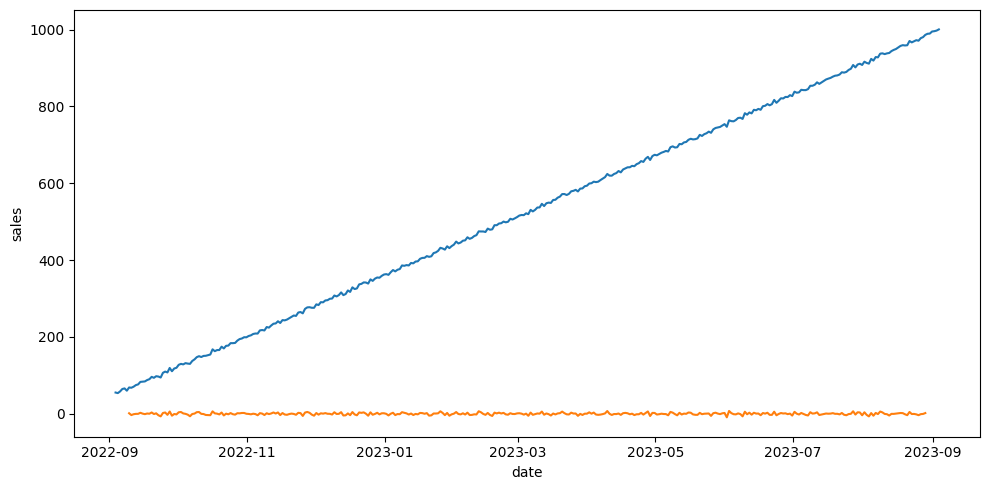

In [10]:
#Analisys of variabilty
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = time_series)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

This graph just confirms the previous observations

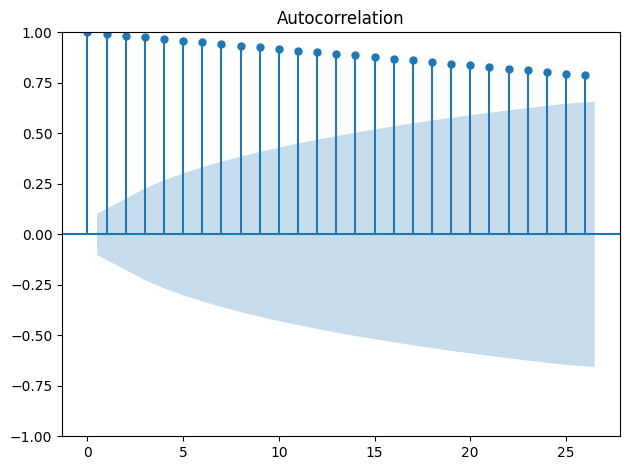

In [11]:
#Autocorrelation analysis
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(time_series)

plt.tight_layout()

plt.show()

The graph above shows high positive correlations that slowly decrease with increasing lags. This indicates a high autocorrelation. 

In [12]:
#Step 3: Training an ARIMA
time_series_stationary = time_series.diff().dropna()

test_stationarity(time_series_stationary)

Dickey-Fuller test results:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [13]:
from pmdarima import auto_arima

model = auto_arima(time_series_stationary, seasonal = True, trace = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1847.120, Time=1.47 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2096.542, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1972.854, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2209.657, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1845.127, Time=0.88 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1843.049, Time=0.52 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1845.092, Time=1.44 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=1843.587, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1841.533, Time=0.32 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=1843.434, Time=1.33 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=1843.433, Time=1.27 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.71 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1839.553, Time=0.18 sec
 ARIMA(1,0,1)(1,0,0)[12] inte

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -915.776
Date:                Fri, 07 Jun 2024   AIC                           1839.553
Time:                        19:41:06   BIC                           1855.152
Sample:                    09-04-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
#Step 4: Predicting with the test set
forecast = model.predict(90)
forecast

2023-09-04 17:10:08.079328    1.675366
2023-09-05 17:10:08.079328    2.673520
2023-09-06 17:10:08.079328    2.591621
2023-09-07 17:10:08.079328    2.598341
2023-09-08 17:10:08.079328    2.597789
                                ...   
2023-11-28 17:10:08.079328    2.597831
2023-11-29 17:10:08.079328    2.597831
2023-11-30 17:10:08.079328    2.597831
2023-12-01 17:10:08.079328    2.597831
2023-12-02 17:10:08.079328    2.597831
Freq: D, Length: 90, dtype: float64

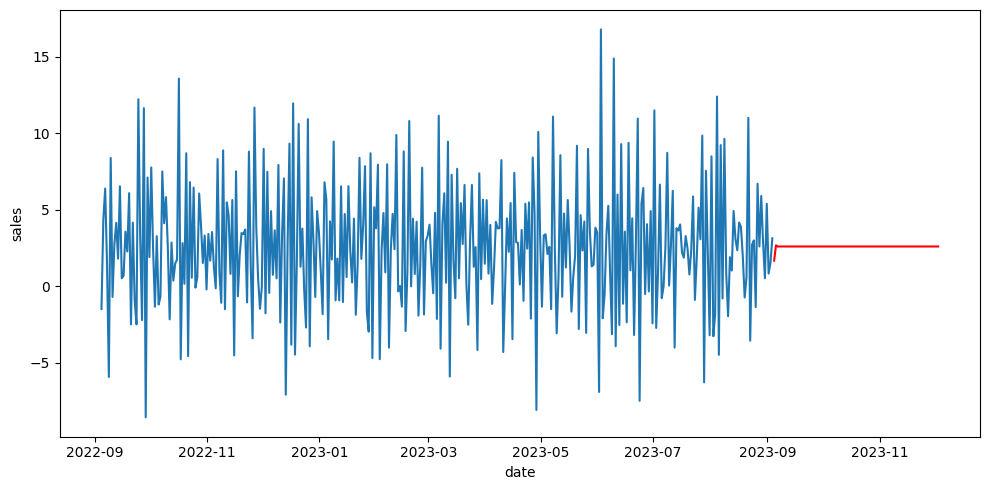

In [16]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = time_series_stationary)
sns.lineplot(data = forecast, c = "red")

plt.tight_layout()

plt.show()



Due to the dataset given, the previous time series and the predicted ones are visualized in this way. The prediction should follow the same trend.

In [18]:
#Step 5: Saving the model
from pickle import dump

dump(time_series_stationary, open("/workspaces/Alternative-time-series-project-Lutciia/models/sales.csv", "wb")) 